In [3]:
import numpy as np 
import pandas as pd 
import quandl, math
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

In [4]:
df = quandl.get('WIKI/GOOGL')
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3424 entries, 2004-08-19 to 2018-03-27
Data columns (total 12 columns):
Open           3424 non-null float64
High           3424 non-null float64
Low            3424 non-null float64
Close          3424 non-null float64
Volume         3424 non-null float64
Ex-Dividend    3424 non-null float64
Split Ratio    3424 non-null float64
Adj. Open      3424 non-null float64
Adj. High      3424 non-null float64
Adj. Low       3424 non-null float64
Adj. Close     3424 non-null float64
Adj. Volume    3424 non-null float64
dtypes: float64(12)
memory usage: 347.8 KB
None
              Open         High          Low        Close        Volume  \
count  3424.000000  3424.000000  3424.000000  3424.000000  3.424000e+03   
mean    596.602610   602.045438   590.571710   596.352862  7.818568e+06   
std     226.989782   227.783310   225.846581   226.896692  8.248211e+06   
min      99.090000   101.740000    95.960000   100.010000  5.211410e+05   
25%     

In [5]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [6]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [7]:
# create a percent volatility feature 
df['HL_PCT'] = (df['Adj. High']-df['Adj. Low'])/df['Adj. Close']*100

In [8]:
df['PCT_Change'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100

In [9]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

In [10]:
df.head()

,Adj. Close,HL_PCT,PCT_Change,Adj. Volume
Date,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0
2004-08-20,54.322689,7.921706,7.227007,22834300.0
2004-08-23,54.869377,4.049360,-1.227880,18256100.0
2004-08-24,52.597363,7.657099,-5.726357,15247300.0
2004-08-25,53.164113,3.886792,1.183658,9188600.0


In [11]:
forecast_col = 'Adj. Close'
df.fillna(-999999, inplace=True)

In [12]:
import math
forecast_out = int(math.ceil(0.01*len(df)))

In [35]:
df['Label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace = True)


In [42]:
df.head()

,Adj. Close,HL_PCT,PCT_Change,Adj. Volume,Lable,Label
Date,,,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0,69.078238,69.078238
2004-08-20,54.322689,7.921706,7.227007,22834300.0,67.839414,67.839414
2004-08-23,54.869377,4.049360,-1.227880,18256100.0,68.912727,68.912727
2004-08-24,52.597363,7.657099,-5.726357,15247300.0,70.668146,70.668146
2004-08-25,53.164113,3.886792,1.183658,9188600.0,71.219849,71.219849


In [87]:
x = np.array(df.drop(['Label'],1))
y = np.array(df['Label'])

In [88]:
x = preprocessing.scale(x)

In [89]:
#x = x[:-forecast_out]
x_later = x[-forecast_out:]

In [90]:
print(len(x), len(y), len(x_later))


3284 3284 35


In [91]:
#build a train and test datasets
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.2)

In [92]:
#build a regression model 
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [93]:
#Evaluate the model 
accuracy = reg.score(x_test, y_test)
accuracy

1.0

In [95]:
prediction = reg.predict(x_later)
print(prediction, accuracy, forecast_out)

[ 941.48  942.02  949.89  941.41  943.29  946.65  950.44  940.13  935.29
  929.75  936.86  947.54  947.55  943.26  934.28  937.43  959.9   964.81
  973.72  967.47  972.08  966.78  985.19  993.64  992.31  987.8  1005.65
 1005.65 1007.87 1009.35 1011.   1012.74 1001.84 1005.07  985.54] 1.0 35


In [108]:
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style 
style.use('ggplot')

In [109]:
df['forecast'] = np.nan

In [110]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [111]:
for i in prediction:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]    

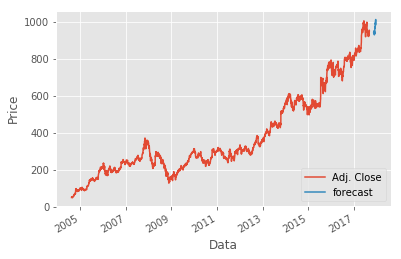

In [112]:
df['Adj. Close'].plot()
df['forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Data')
plt.ylabel('Price')
plt.show()